<a href="https://colab.research.google.com/github/nam157/crnn/blob/main/preprocessing_crnn_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import string,cv2
import pathlib,json,os

In [ ]:
current_directory_path = pathlib.Path(".").absolute()
current_directory_path

WindowsPath('C:/Users/nguye/OneDrive/Code/handwirtting_text2')

In [ ]:
# Import json file 1
with open('C:/Users/nguye/OneDrive/Code/handwirtting_text2/datasets/raw/labels_0916.json',encoding='utf8') as json_file:
    label_data = json.load(json_file)

In [ ]:
label_data['0000_tests.png']

'Số 10, đường Lý Văn Lâm, Phường 1, Thành Phố Cà Mau, Cà Mau'

In [ ]:
char_list= set()
for label in label_data.values():
    char_list.update(set(label))
char_list=sorted(char_list)
print(char_list)

[' ', '#', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Â', 'Ê', 'Ô', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'Đ', 'đ', 'ĩ', 'ũ', 'Ơ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ắ', 'ằ', 'ẵ', 'ặ', 'ẹ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'Ứ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỵ', 'ỷ', 'ỹ']


In [ ]:
"".join(char_list)

" #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩẫậắằẵặẹẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ"

In [ ]:
"""
Mã hóa chuỗi lấy index từ char_list
"""
def encode_to_labels(txt):
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list :", char)
        
    return dig_lst

In [ ]:
raw_folder = 'C:/Users/nguye/OneDrive/Code/handwirtting_text2/datasets/raw/'

In [ ]:
train_image_path = []

for item in pathlib.Path(raw_folder).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))

In [ ]:
train_image_path

['C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0000_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0000_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0001_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0001_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0002_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0002_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0003_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0003_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0004_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0004_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0005_samples.png',
 'C:\\Users\\nguye\\

In [ ]:
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(raw_folder))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels_0916.json":
        label = label_data[file_name]
        dict_filepath_label[str(item)]=label

In [ ]:
dict_filepath_label

{'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0000_tests.png': 'Số 10, đường Lý Văn Lâm, Phường 1, Thành Phố Cà Mau, Cà Mau',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0001_tests.png': '271 Huỳnh Ngọc Huệ, Phường Hoà Khê, Quận Thanh Khê, Đà Nẵng',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0002_samples.png': 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0002_tests.png': 'Số 35/70B, KP 9, Phường Hố Nai, Thành Phố Biên Hoà, Đồng Nai',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\00

In [ ]:
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

max_label_len

69

In [ ]:
all_image_paths = list(dict_filepath_label.keys())

In [ ]:
all_image_paths[:10]

['C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0000_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0000_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0001_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0001_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0002_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0002_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0003_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0003_tests.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0004_samples.png',
 'C:\\Users\\nguye\\OneDrive\\Code\\handwirtting_text2\\datasets\\raw\\0004_tests.png']

In [ ]:
import cv2
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)

In [ ]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

In [ ]:
(min_height, max_height, min_width, max_width)

(91, 118, 1662, 1912)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(all_image_paths,test_size=0.2,random_state=1)

In [ ]:
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
TIME_STEPS = 240

![image.png](attachment:image.png)
Chúng ta sẽ resize lại bức ảnh, tuy nhiên ở bài trước đầu vào 1 từ vì vậy input khác bây giờ đầu vào của bài toán chúng ta câu vì chúng cần rezise lại (118,2167)

In [ ]:
"""
Tạo tập dữ liệu training, mã hóa, độ dài đầu vào 
"""
i = 0
for train_img_path in X_train:
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    w, h = img.shape
    new_w = 118
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    img = img.astype('float32')
    
    
    if w < 118:
        add_zeros = np.full((118-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if h < 2167:
        add_zeros = np.full((w, 2167-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
    if h > 2167 or w > 118:
        dim = (2167,118)
        img = cv2.resize(img, dim)
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        
    img = cv2.subtract(255, img)
    img = np.expand_dims(img , axis = 2)
    img = img/255.0
    label = dict_filepath_label[train_img_path]
    orig_txt.append(label)   
    train_label_length.append(len(label))
    train_input_length.append(TIME_STEPS)
    training_img.append(img)
    training_txt.append(encode_to_labels(label)) 
    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))

has processed trained 500 files
has processed trained 1000 files
has processed trained 1500 files


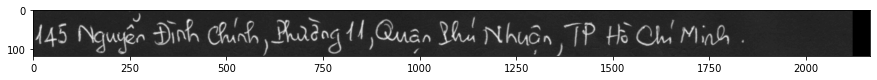

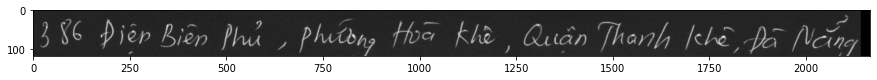

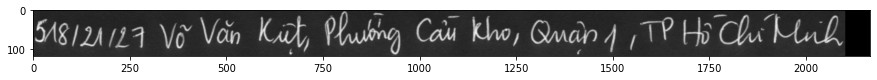

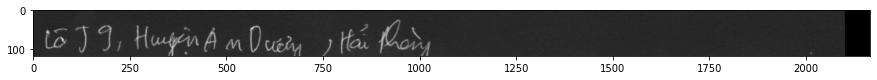

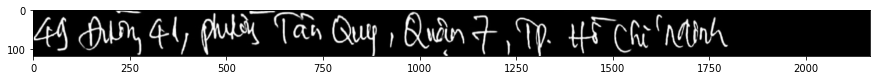

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    plt.show()

In [ ]:
"""
Tạo tập dữ liệu validation, mã hóa, độ dài đầu vào
"""
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i = 0
for train_img_path in X_test:
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    w, h = img.shape
    new_w = 118
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    img = img.astype('float32')
    
    

    if w < 118:
        add_zeros = np.full((118-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if h < 2167:
        add_zeros = np.full((w, 2167-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
    if h > 2167 or w > 118:
        dim = (2167,118)
        img = cv2.resize(img, dim)
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
    
    img = cv2.subtract(255, img)
    img = np.expand_dims(img , axis = 2)
    img = img/255.0
    label = dict_filepath_label[train_img_path]
    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)
    valid_txt.append(encode_to_labels(label)) 
    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))

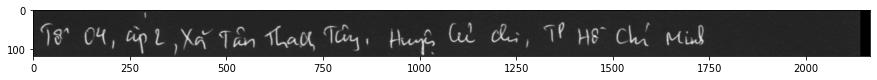

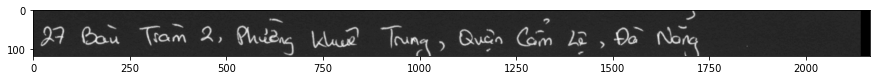

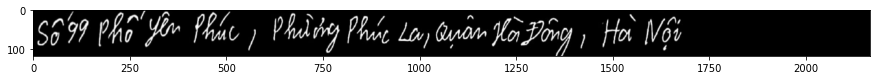

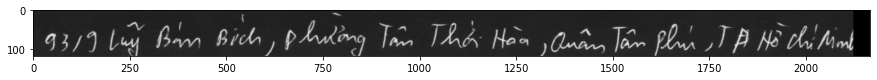

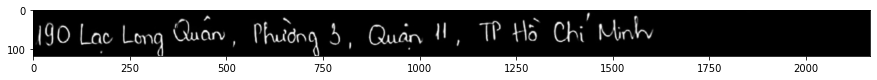

In [ ]:
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="gray")
    plt.show()

In [ ]:
max_label_len = TIME_STEPS 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [ ]:
training_img[4].shape,valid_img[4].shape

((118, 2167, 1), (118, 2167, 1))